# Lecture 15: Fourier Analysis II.

## Jacobi $\theta$ functions

We define the Jacobi $\theta$ function by

$$
\theta(x) = \sum_{n=-\infty}^\infty e^{-n^2 \pi x}.
$$

Using Plancherel's theorem we prove the functional equation

$$
\theta(x) = \sum_{n=-\infty}^\infty e^{-n^2 \pi x} = \frac{1}{\sqrt{x}} \sum_{\nu=-\infty}^\infty e^{-\nu^2 \pi/x}
= \frac{1}{\sqrt{x}} \theta\left(\frac{1}{x}\right).
$$

In [1]:
using PyPlot
PyPlot.svg(true);

In [2]:
# Convergence of the Jacobi sum for arguments x ≪ 1

x = 0.04

# summands of the original sum
ns = 0:10

exp.(-ns.^2*π*x)

11-element Array{Float64,1}:
 1.0                   
 0.8819113782981763    
 0.6049225627642709    
 0.322718983267049     
 0.133905721399763     
 0.04321391826377226   
 0.010846710538160161  
 0.002117494770632841  
 0.00032151151668886733
 3.796825289201935e-5  
 3.4873423562089973e-6 

In [3]:
# sum them up
S_orig = 1.0

for n=1:10
    S_orig += 2exp(-n^2*π*x)
    
    println(S_orig)
end

2.763822756596353
3.9736678821248947
4.619105848658993
4.886917291458519
4.973345127986064
4.995038549062384
4.99927353860365
4.999916561637028
4.999992498142812
4.9999994728275245


In [4]:
# summands of the sum for 1/x
ns = 0:10

exp.(-ns.^2*π/x)

11-element Array{Float64,1}:
 1.0                    
 7.773044498987552e-35  
 3.650603079495543e-137 
 1.0359060884027386e-307
 0.0                    
 0.0                    
 0.0                    
 0.0                    
 0.0                    
 0.0                    
 0.0                    

In [5]:
# sum them up
S_inv = 1.0

for n=1:10
    S_inv += 2exp(-n^2*π/x)
    
    println(S_inv)
end

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [6]:
# summing the series in Real space

S_orig

4.9999994728275245

In [7]:
# summing the series in Fourier space

S_inv/sqrt(x)

5.0

In [8]:
# What does such a weird function look like?
function θ(x; N=100000)
    S = 1.0
    
    if abs(x) >= 1
        # Use the regular formula
        for n=1:N
            S += 2exp(-n^2*π*x)
        end
        
        return S
    else
        # use the functional equation
        for ν=1:N
            S += 2exp(-ν^2*π/x)
        end
        
        return S/sqrt(x)
    end
end

θ (generic function with 1 method)

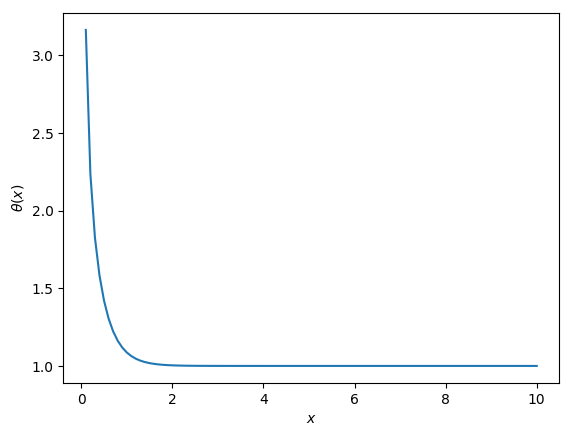

PyObject Text(26.000000000000007, 0.5, '$θ(x)$')

In [9]:
xs = LinRange(0.1, 10, 100)
θs = θ.(xs)

fig, ax = subplots()

ax.plot(xs, θs)
ax.set_xlabel(L"x")
ax.set_ylabel(L"θ(x)")

In [ ]:
# what if x is complex?

function complex_θ(n)
    Res = LinRange(0.1, 1, n)
    Ims = 1im*LinRange(-2, 2, n)
    
    # set up matrix of values
    x0 = zeros(Complex, n, n)
    for (i, re) in enumerate(Res)
        for (j, im) in enumerate(Ims)
            x0[j,i] = re + im
        end
    end
    
    # return complex angle of solution
    return θ.(x0)
end

θs = complex_θ(100)

In [ ]:
fig, axs = subplots(1, 2)

axs[1].imshow(abs.(θs), extent=[0.1, 1, -2, 2])
axs[1].set_title(L"absolute value $|\theta(z)|$")

axs[1].set_xlabel(L"Re$(z)$")
axs[1].set_ylabel(L"Im$(z)$")

axs[2].imshow(angle.(θs), extent=[0.1, 1, -2, 2])
axs[2].set_title(L"argument $\arg (\theta(z))$")

axs[2].set_xlabel(L"Re$(z)$")
axs[2].set_ylabel(L"Im$(z)$")